# Курсовая работа, Вашченков В.Э.

### В проекте я собираюсь исследовать, как менялся бюджет фильма от года выпуска, а так же оценки пользователей сайта imdb и лайки из социальной сети Facebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [223]:
import warnings
warnings.filterwarnings('ignore')

## 1. Датасет

#### Загрузка датасета

Датасет я взял отсюда https://www.kaggle.com/antoniobap/imdb-v3

In [190]:
df = pd.read_csv('./Курсовая/movie_metadata_modificado3.csv', engine='python')
df.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,Animation,Biography,Crime,sum_total_likes,ratio_movie_cast_likes,normalized_movies_likes,normalized_cast_likes,normalized10_movies_likes,normalized10_cast_likes,score
0,Color,Adam McKay,181.0,98.0,Will Ferrell,84136909.0,Darcy Donavan,Anchorman: The Legend of Ron Burgundy?,267921,656730.0,...,0,0,0,655285,0.0,1.0,100.00,1.00,10.00,4
1,Color,David R. Ellis,221.0,82.0,Andrew Fiscella,66466372.0,Krista Allen,The Final Destination?,75345,303717.0,...,0,0,0,301908,0.0,1.0,46.78,1.00,5.16,3
2,Color,Travis Romero,5.0,67.0,Lorraine Ziff,NaN,Matthew Ziff,Treachery?,344,283939.0,...,0,0,0,283004,0.0,1.0,43.80,1.00,4.89,2
3,Color,Johnny Remo,2.0,112.0,Randy Wayne,96734.0,Matthew Ziff,Hardflip?,606,263584.0,...,0,0,0,261949,0.0,1.2,40.73,1.02,4.61,3
4,NaN,John Stockwell,2.0,90.0,T.J. Storm,NaN,Matthew Ziff,Kickboxer: Vengeance?,246,261818.0,...,0,0,0,260942,0.0,1.0,40.47,1.00,4.59,5


#### Посмотрим, какие колонки у него есть

In [191]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_2_name', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi',
       'Thriller', 'Documentary', 'Family', 'Musical', 'Romance', 'Mystery',
       'Western', 'Comedy', 'Sport', 'Horror', 'Drama', 'War', 'History',
       'Animation', 'Biography', 'Crime', 'sum_total_likes',
       'ratio_movie_cast_likes', 'normalized_movies_likes',
       'normalized_cast_likes', 'normalized10_movies_likes',
       'normalized10_cast_likes', 'score'],
      dtype='object')

#### Далеко не все колонки нужны для текущего исследования, удалим лишние

In [192]:
df = df.drop(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary',
         'Family', 'Musical', 'Romance', 'Mystery', 'Western', 'Comedy', 'Sport',
         'Horror', 'Drama', 'War', 'History', 'Animation', 'Biography', 'Crime',
         'color', 'director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
         'actor_1_name', 'movie_title', 'num_voted_users', 'actor_3_name', 'facenumber_in_poster',
         'plot_keywords', 'num_user_for_reviews', 'content_rating', 'aspect_ratio',
         'normalized10_movies_likes', 'normalized10_cast_likes'],
       axis=1)

In [193]:
df.columns

Index(['gross', 'cast_total_facebook_likes', 'movie_imdb_link', 'language',
       'country', 'budget', 'title_year', 'imdb_score', 'movie_facebook_likes',
       'sum_total_likes', 'ratio_movie_cast_likes', 'normalized_movies_likes',
       'normalized_cast_likes', 'score'],
      dtype='object')

#### Больше всего меня интересует бюждет, поэтому те записи, информации о бюджете которых нет, я выкину.

In [194]:
df = df[df['budget'] > 0]

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 5042
Data columns (total 14 columns):
gross                        3891 non-null float64
cast_total_facebook_likes    4524 non-null float64
movie_imdb_link              4551 non-null object
language                     4542 non-null object
country                      4550 non-null object
budget                       4551 non-null float64
title_year                   4543 non-null float64
imdb_score                   4551 non-null float64
movie_facebook_likes         2562 non-null float64
sum_total_likes              4551 non-null int64
ratio_movie_cast_likes       4536 non-null float64
normalized_movies_likes      4551 non-null float64
normalized_cast_likes        4551 non-null float64
score                        4551 non-null int64
dtypes: float64(9), int64(2), object(3)
memory usage: 533.3+ KB


#### Мне кажется, что бюджет удобнее смотреть в миллионах, поэтому немного уменьшим поле бюджета

In [196]:
df['budget'] = df['budget']/1000000

In [197]:
df.describe()['budget']

count     4551.000000
mean        39.752620
std        206.114898
min          0.000218
25%          6.000000
50%         20.000000
75%         45.000000
max      12215.500000
Name: budget, dtype: float64

#### Бюджет 12 миллиардов долларов - это не нормально, посмотрим на самые дорогие фильмы

In [204]:
print(df.loc[df['budget'] > 300, ['budget', 'movie_imdb_link']])

            budget                                    movie_imdb_link
1527    700.000000  http://www.imdb.com/title/tt0449999/?ref_=fn_t...
2749   2400.000000  http://www.imdb.com/title/tt0119698/?ref_=fn_t...
3162    553.632000  http://www.imdb.com/title/tt0425637/?ref_=fn_t...
3429    600.000000  http://www.imdb.com/title/tt1198101/?ref_=fn_t...
3997  12215.500000  http://www.imdb.com/title/tt0468492/?ref_=fn_t...
4170   2127.519898  http://www.imdb.com/title/tt0348121/?ref_=fn_t...
4237   4200.000000  http://www.imdb.com/title/tt0451094/?ref_=fn_t...
4639    700.000000  http://www.imdb.com/title/tt0120274/?ref_=fn_t...
4826    390.000000  http://www.imdb.com/title/tt0151137/?ref_=fn_t...
4925   1000.000000  http://www.imdb.com/title/tt0188640/?ref_=fn_t...
4951    400.000000  http://www.imdb.com/title/tt0290879/?ref_=fn_t...
4960   1100.000000  http://www.imdb.com/title/tt0094625/?ref_=fn_t...
4986   2500.000000  http://www.imdb.com/title/tt0367082/?ref_=fn_t...


 #### К сожалению, оказалось, что в поле budget иногда написана стоимость в местной валюте, в других датасетах, что я находил, та же проблема (видимо, из одного источника), как-то перевести бюджет всех таких фильмов я не могу. Хоть это и повлияет на результат, я от своей цели не отступлюсь, для самых дорогих фильмов поправлю бюджет вручную (к сожалению, по текущему курсу).

In [210]:
df.loc[1527, ['budget']] = 10
df.loc[2749, ['budget']] = 22
df.loc[3162, ['budget']] = 80
df.loc[3429, ['budget']] = 8.5
df.loc[3997, ['budget']] = 10
df.loc[4170, ['budget']] = 19.5
df.loc[4237, ['budget']] = 3.5
df.loc[4639, ['budget']] = 4.7
df.loc[4826, ['budget']] = 85
df.loc[4925, ['budget']] = 13
df.loc[4951, ['budget']] = 12.5
df.loc[4960, ['budget']] = 10
df.loc[4986, ['budget']] = 8.5

## 2. Подготовка к анализу

#### Для начала рассмотрим корреляцию всех признаков, которые я оставил

Text(0.5,1,'Correlation heatmap')

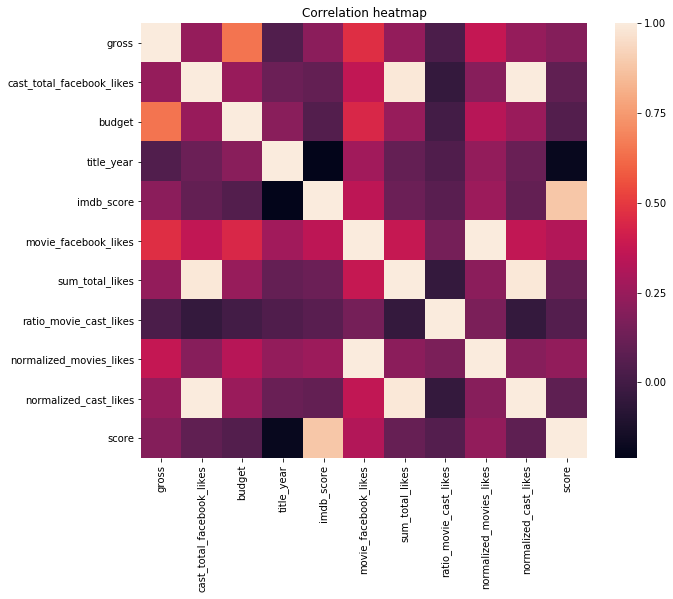

In [243]:
fig, ax = plt.subplots(figsize=(10,8))
correl = df[['gross', 'cast_total_facebook_likes', 'movie_imdb_link', 'language',
       'country', 'budget', 'title_year', 'imdb_score', 'movie_facebook_likes',
       'sum_total_likes', 'ratio_movie_cast_likes', 'normalized_movies_likes',
       'normalized_cast_likes', 'score']].copy()
correl = correl.corr()
sns.heatmap(correl, ax=ax)
ax.set_title('Correlation heatmap')

#### Нам интересно корреляция бюджета и различных оценок. Я в дальнейшем возьму признак imdb_score как слабо коррелирующий (к тому же, это тот признак, который я изначально хотел исследовать), и признак movie_facebook_likes - как сильно коррелирующий.

## 3. Средний бюджет по годам

#### Построим график среднего бюджета фильмов по годам, на графике так же отметим количество фильмов в данном временном промежутке - это позволит сразу понять, насколько средний бюджет является действительно средним

In [211]:
df_budget_mean = df.groupby(['title_year'], as_index=False)[['budget']].agg(['mean', 'count']) \
                   .rename(columns={'mean':'mean_year_budget', 'count': 'count_year'})
df_budget_mean.columns = df_budget_mean.columns.droplevel(0)
df_budget_mean = df_budget_mean.reset_index()

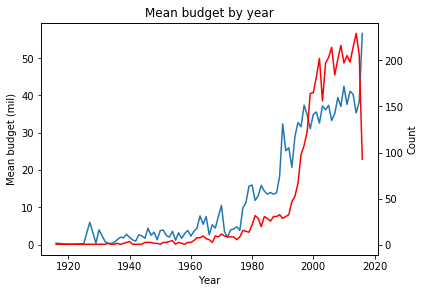

In [212]:
fig, ax_bud = plt.subplots()
ax_bud.set_xlabel('Year')
ax_bud.set_ylabel('Mean budget (mil)')
ax_bud.plot(df_budget_mean['title_year'], df_budget_mean['mean_year_budget'])

ax_cnt = ax_bud.twinx()
ax_cnt.plot(df_budget_mean['title_year'], df_budget_mean['count_year'], color='red')
ax_cnt.set_ylabel('Count')

fig.tight_layout()
plt.title('Mean budget by year')
plt.show()

#### Посмотрим внимательнее зону роста после 1980го года

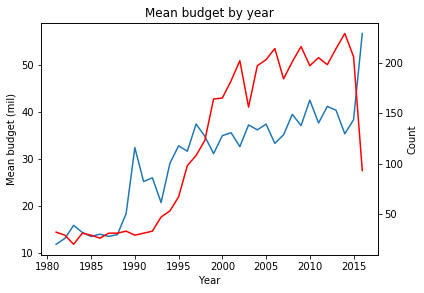

In [214]:
fig, ax_bud = plt.subplots()
ax_bud.set_xlabel('Year')
ax_bud.set_ylabel('Mean budget (mil)')
ax_bud.plot(df_budget_mean.loc[df_budget_mean['title_year'] > 1980, 'title_year'],
            df_budget_mean.loc[df_budget_mean['title_year'] > 1980, 'mean_year_budget'])

ax_cnt = ax_bud.twinx()
ax_cnt.plot(df_budget_mean.loc[df_budget_mean['title_year'] > 1980, 'title_year'],
            df_budget_mean.loc[df_budget_mean['title_year'] > 1980, 'count_year'],
            color='red')
ax_cnt.set_ylabel('Count')

fig.tight_layout()
plt.title('Mean budget by year')
plt.show()

#### Как видим, средний бюджет фильмов с течением времени растёт. Оно и не удивительно, учитывая инфляцию и сколько в принципе сил сейчас вкладывается в современный кинематограф

## 4. Зависимость оценок пользователей от бюджета фильма

### Теперь будем исследовать оценки в зависимости от бюджета и года, и начнём с оценки сайта imdb
#### Определим, как в целом меняются оценки пользователей сайта imdb в зависимости от возраста фильма и есть ли зависимость оценок пользователей от бюджета на всей выборке

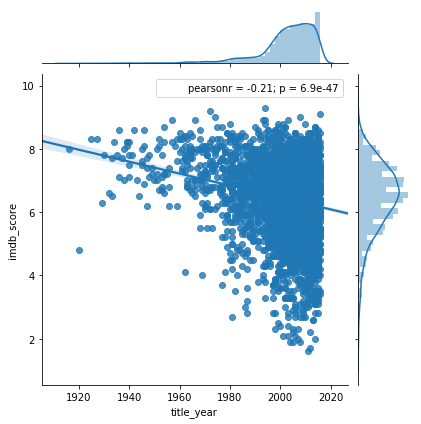

In [225]:
sns.jointplot(x='title_year', y='imdb_score', data=df, kind='reg')

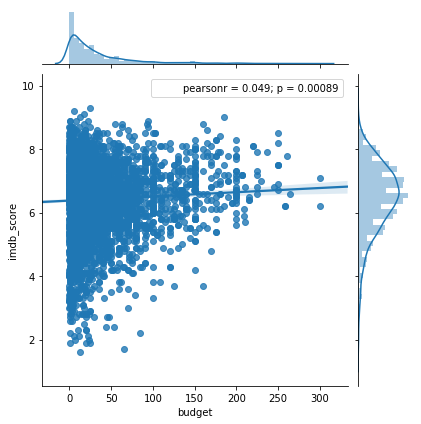

In [224]:
sns.jointplot(x='budget', y='imdb_score', data=df, kind='reg')

#### Рейтинг от бюджета зависит слабо, а вот годовая тенденция, похоже, показывает, что у более новых фильмов рейтинг ниже. Полагаю, что люди, которые оставляют отзыв от старого фильма на сайте imdb, искали этот фильм специально исходя из своих предпочтений, поэтому выше шанс, что фильм им понравился. Исходя из этого получаем, что средний рейтинг старых фильмов может быть выше, при этом их посмотрели только ценители.

#### Рассмотрим зависимость бюджета от года внимательнее - разобъем всю выборку по годам на интервалы

1900 - 1980

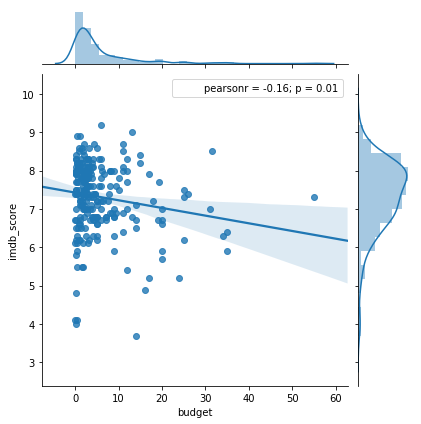

In [257]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(1900 <= df['title_year']) & (df['title_year'] < 1980)],
              kind='reg')

1980 - 1990

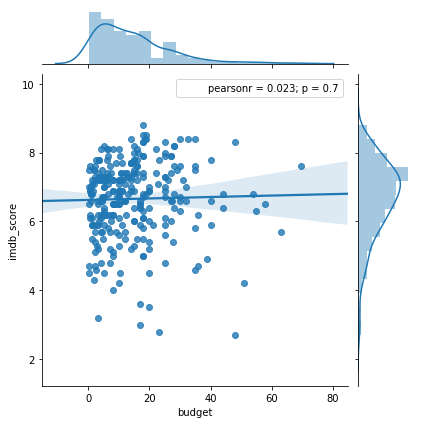

In [258]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(1980 <= df['title_year']) & (df['title_year'] < 1990)],
              kind='reg')

1990 - 2000

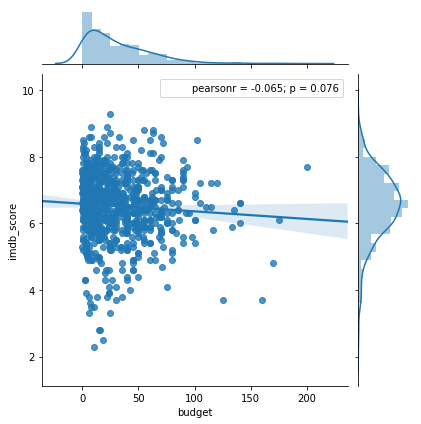

In [231]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(1990 <= df['title_year']) & (df['title_year'] < 2000)],
              kind='reg')

2000 - 2005

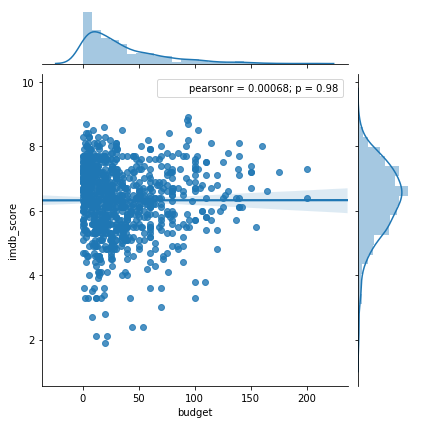

In [232]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(2000 <= df['title_year']) & (df['title_year'] < 2005)],
              kind='reg')

2005 - 2009

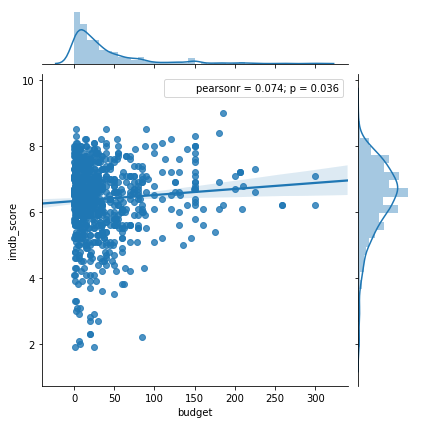

In [233]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(2005 <= df['title_year']) & (df['title_year'] < 2009)],
              kind='reg')

2009 - 2013

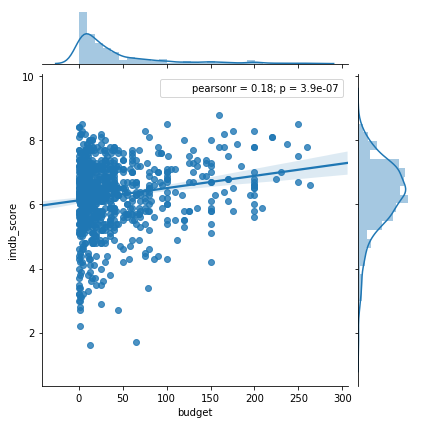

In [234]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(2009 <= df['title_year']) & (df['title_year'] < 2013)],
              kind='reg')

2013 - 2016

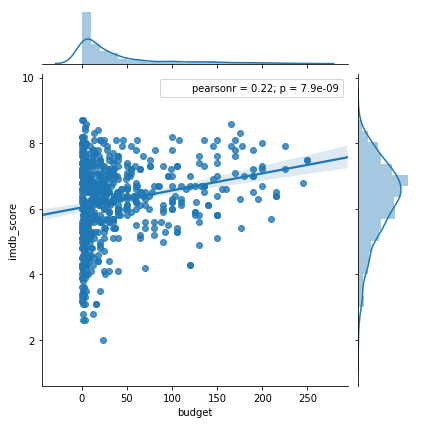

In [235]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(2013 <= df['title_year']) & (df['title_year'] < 2016)],
              kind='reg')

2016 - 2020

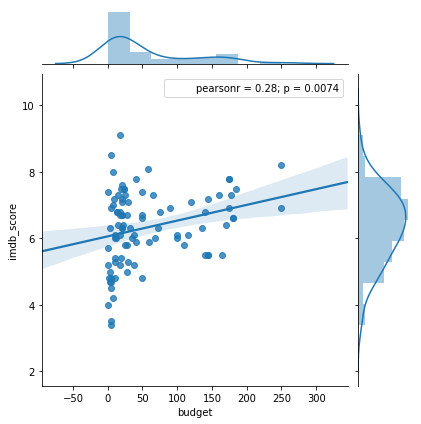

In [236]:
sns.jointplot(x='budget', y='imdb_score',
              data=df.loc[(2016 <= df['title_year']) & (df['title_year'] < 2020)],
              kind='reg')

#### Мы видим, что раньше была обратная тенденция - чем дороже фильм, тем хуже у него рейтинг на сайте, которая затем постепенно перешла в положительную тенденцию. Я думаю, что это связано с тем, что старые фильмы смотрят таргетно, и лучшие из них не высокобюджетные.

### Теперь тоже самое сделаем для оценки лайков кино в социальной сети Facebook

#### Зависимость лайков в Фейсбуке от возраста в фильма

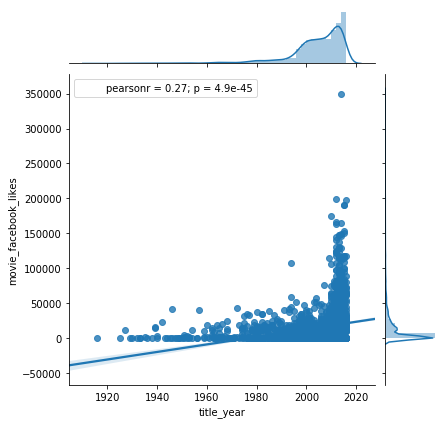

In [261]:
sns.jointplot(x='title_year', y='movie_facebook_likes', data=df, kind='reg')

#### Зависимость лайков в Фейсбуке от бюджета фильма

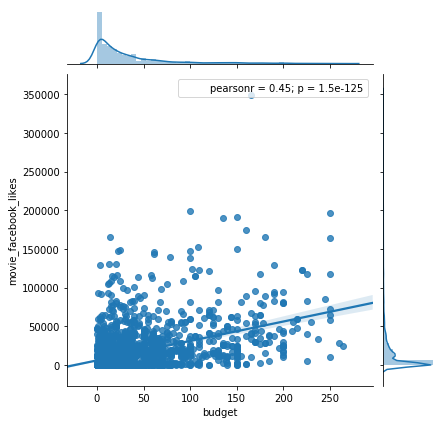

In [262]:
sns.jointplot(x='budget', y='movie_facebook_likes', data=df, kind='reg')

#### Для новых фильмов в среднем лайков намного больше, чем для старых, и резкий рост в 2005м году можно связать с появлением и популяризацией социальной сети - люди охотнее лайкают современные фильмы. Так же видна тендеция большего числа лайков у фильмов с большим бюджетом.

1900 - 1980

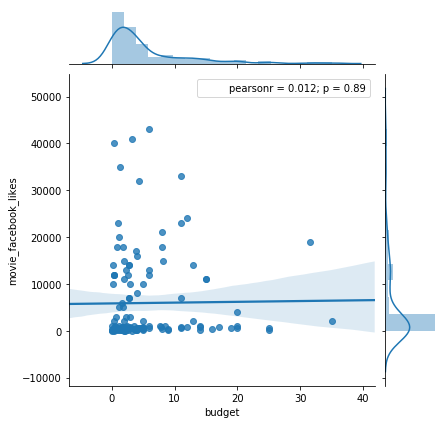

In [255]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(1900 <= df['title_year']) & (df['title_year'] < 1980)],
              kind='reg')

1980 - 1990

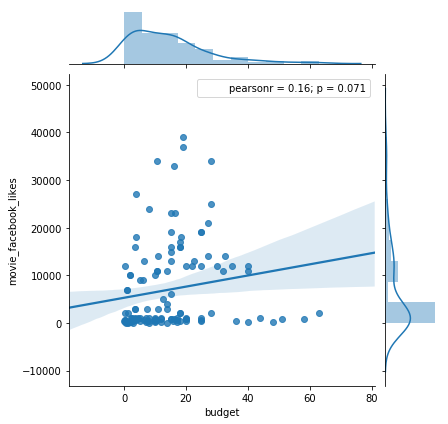

In [256]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(1980 <= df['title_year']) & (df['title_year'] < 1990)],
              kind='reg')

1990 - 2000

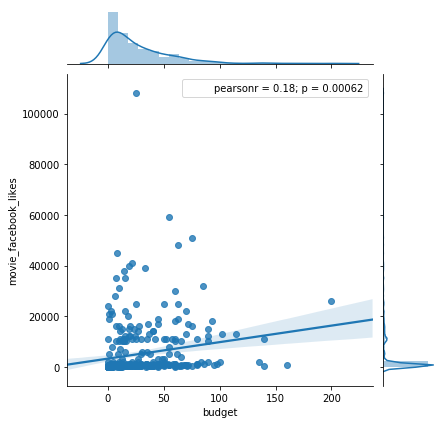

In [249]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(1990 <= df['title_year']) & (df['title_year'] < 2000)],
              kind='reg')

2000 - 2005

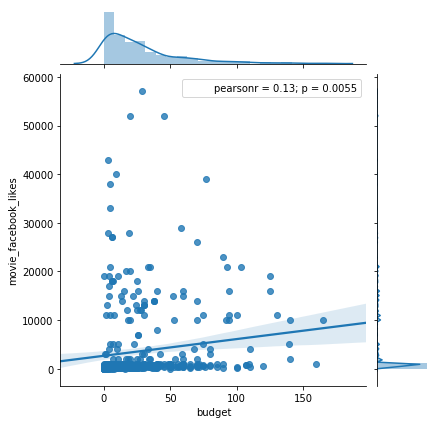

In [250]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(2000 <= df['title_year']) & (df['title_year'] < 2005)],
              kind='reg')

2005 - 2009

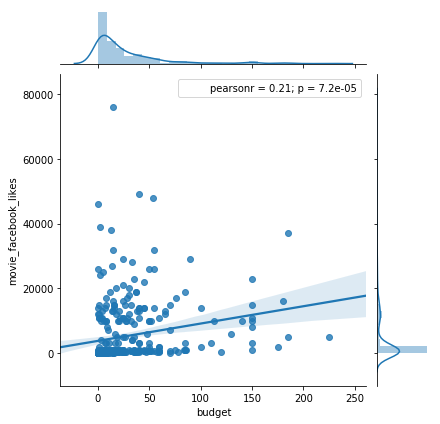

In [251]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(2005 <= df['title_year']) & (df['title_year'] < 2009)],
              kind='reg')

2009 - 2013

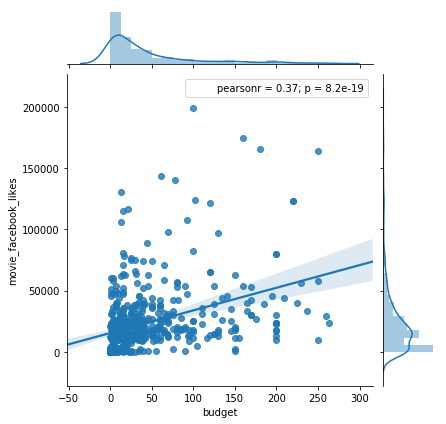

In [252]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(2009 <= df['title_year']) & (df['title_year'] < 2013)],
              kind='reg')

2013 - 2016

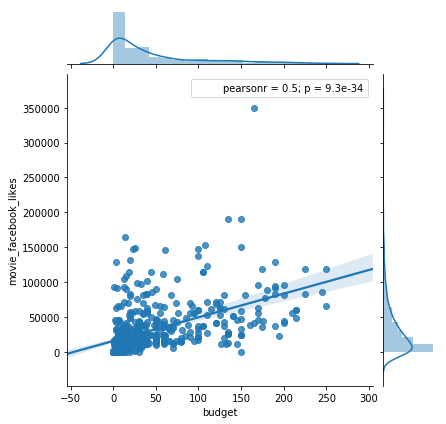

In [253]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(2013 <= df['title_year']) & (df['title_year'] < 2016)],
              kind='reg')

2016 - 2020

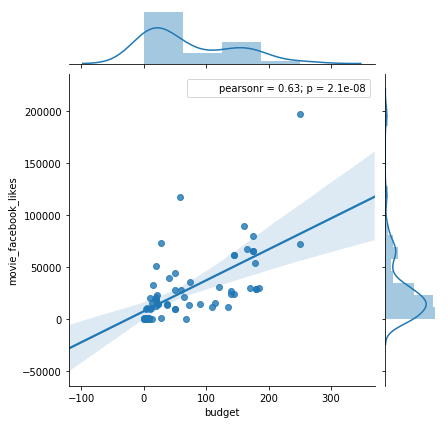

In [254]:
sns.jointplot(x='budget', y='movie_facebook_likes',
              data=df.loc[(2016 <= df['title_year']) & (df['title_year'] < 2020)],
              kind='reg')

#### Для старых фильмов (по совокупности фильмов до 1980го года) нет почти зависимости количества лайков от бюджета, но в более новые периоды такая зависимость появляется и чем больше бюджет у фильма, тем больше у него лайков в соцсети. Бюджет современного фильма тратится в том числе и на рекламу и продвижение. Чем больше потрачено на это денег, тем больше шансов, что случайный пользователь Facebook'а, даже не любящий смотреть кино, увидит рекламу и поставит лайк (возможно, просто из-за красивого постера или из-за того, что другие ставят лайк). В связи с этим мы видим резкий рост в количестве лайков для фильмов, вышедших после 2005го года - 1980м году никто не думал тратиться на рекламу во Facebook'е.

## 5. Выводы

1) Первый небольшой вывод, с которого я начну - средний бюджет растёт со временем. Причём после 1980го года наблюдается некий скачёк в среднем бюджете.

2) Оценки пользователей на старые фильмы не сильно зависят от бюджета фильма. Вероятно, это связано с тем, когда вообще появились у людей возможность оценки фильма на сайте imdb или в сети Facebook. Если пользователь поставил оценку фильму 1930го года, то, скорее всего, он вышел на этот фильм, исходя из своих предпочтений - любимый актёр/режиссёр, желание посмотреть культовый фильм, разобранный на цитаты, или же желание познакомиться с начнателями определённого жанра. Такие критерии выбора, скорее всего, почти не зависят от бюджета фильма, однако при таком подходе высок шанс, что пользователю фильм понравится. Отчасти это подтверждается общей корреляцией оценок пользователей сайта imdb от года - по ней получается, что у новых фильмов оценки ниже, чем у старых.

3) А вот у новых фильмов оценка пользователей сайта imdb растёт в зависимости от бюджета. К примеру, за последние 10 лет у фильмов, бюджет которых больше 60 млн. долларов, почти наверняка средняя оценка будет больше 5ти, что не являлось правдой для более старых фильмов.

4) В сравнении оценок по сайту imdb и в социальной сети видны расхождения. Оценки сайтов имеют разную суть - если оценка сайта imdb это усреднённая оценка по всем пользователям, давшим фильму качественную оценку, то лайки Facebook'а - это просто количество пользователей, решивших по каким-то причинам нажать лайк. Сравнивать не совсем корректно, но к каким-то выводам придти можно. Imdb, как специализированный сайт, имеет другую аудиторию - если во Фейсбуке оценки ставятся в теми людьми, который случайно увидели пост с фильмом (это может быть репост в на странице друга или в какой-то группе, возможно, даже не связанной с фильмом), то на сайте imdb отзывы оставляют в основном пользователи, считающие просмотр фильмов своим хобби.